- Class blog: https://pic16b-ucla.github.io/24F
- Quarto instructions online, to be covered in the discussion session tomorrow. 

- Introduction + Project pitch: deadline next Wednesday. This is your first project assignment.
- [Homework 0](https://pic16b-ucla.github.io/24W/posts/hw0/): deadline Monday, Oct 14th. Some homework assignments will feature autograders -- start early!


# Advanced Data Manipulation

Over the next two weeks or so, we'll develop a range of skills for advanced data analysis in Python. We'll handle questions like: 

1. What if our data is split over multiple files?
2. What if our data is in the wrong shape?
3. What if our data is too big to conveniently fit in memory?  

To approach these questions, we'll develop some more advanced skills with the familiar `pandas` library. We'll also introduce new tools for plotting, including spatial plots, and take a brief look at databases. 

## Case Study: Global Warming

Throughout our study, we'll focus on a single data set. This is the Global Historical Climatology Network data set, compiled by the National Centers for Environmental Information of the US National Oceanic and Atmospheric Administration. This data set contains an extraordinarily detailed record of surface temperatures at tens of thousands of atmospheric measurement stations across the globe. It is thus an ideal, publicly available data set for studying global warming. 

https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly


An additional reason to be concerned about global warming is that rising temperatures reduce snowfall, a necessary prerequisite for videos of panda bears falling off of snowmen: 

<figure class="image" style="width:50%">
  <img src="https://media1.tenor.com/images/c20400089a4f275b4c1b32ebe309d93f/tenor.gif" alt="">
  <figcaption><i></i></figcaption>
</figure>

### Takeaways for Today

Here's what I want you to take away from this lecture: 

1. Many **data visualization** problems can be solved by **data manipulation**. 
2. `pandas` provides a number of handy methods for combining and reshaping your data. 
3. Pandas are very clumsy animals. 


### Data Source and Format

The raw data can be accessed [here](https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/global-historical-climatology-network-monthly-version-4), and then a small amount of manipulation was performed in order to save it as a set of CSV files. The files are hosted online at 

> `https://raw.githubusercontent.com/PIC16B-ucla/24F/main/datasets/noaa-ghcn/decades/`

There is a file for each decade between 1901 and 2020. Today, we'll use only the file containing the most recent data, 2011-2020. 

In [1]:
import pandas as pd

# advanced plotting tools for data frames
# basically a bunch of matplotlib shortcuts
import seaborn as sns 

from matplotlib import pyplot as plt
import numpy as np

In [2]:
interval = "2011-2020"
url = f"https://raw.githubusercontent.com/PIC16B-ucla/24F/main/datasets/noaa-ghcn/decades/{interval}.csv"
df = pd.read_csv(url)

Let's use `.head()` method to acces the first five entries:

In [3]:
df.head(5)

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,ACW00011604,2011,-83.0,-132.0,278.0,1040.0,1213.0,1663.0,1875.0,1723.0,1466.0,987.0,721.0,428.0
1,ACW00011604,2012,121.0,-98.0,592.0,646.0,1365.0,1426.0,1771.0,1748.0,1362.0,826.0,620.0,-234.0
2,ACW00011604,2013,-104.0,-93.0,-48.0,595.0,NaN,1612.0,1855.0,1802.0,1359.0,1042.0,601.0,NaN
3,AE000041196,2011,1950.0,2060.0,2280.0,2760.0,3240.0,3447.0,3580.0,3650.0,3316.0,2940.0,2390.0,1905.0
4,AE000041196,2012,1837.0,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As provided, the data set contains the following columns: 

- `ID`: the ID number of the station. First two letters represent the country 
- `Year`: the year of the measurement. 
- `VALUE1`-`VALUE12`: the temperature measurements themselves. 
- The measurements are in hundredths of a degree, Celsius. 

This type of table is called **wide format** table, every variable getting its own column.

In [4]:
# measurement in February in very first row of DF - iloc attribute
df["VALUE2"].iloc[0]
# temperature in degrees C is
df["VALUE2"].iloc[0] /100

-1.32

We can now do things like plot the temperature in January for a selected station: 

<Axes: xlabel='Year', ylabel='VALUE1'>

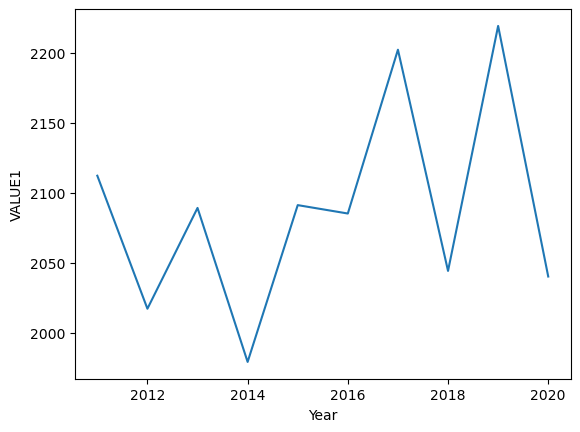

In [6]:
station_df = df[df["ID"] == "AEM00041194"]
sns.lineplot(data = station_df, x = "Year", y = "VALUE1")

In [7]:
station_df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
16,AEM00041194,2011,2112.0,2162.0,2390.0,2896.0,3307.0,3465.0,3656.0,3641.0,3441.0,3090.0,2598.0,2136.0
17,AEM00041194,2012,2017.0,2115.0,2397.0,2839.0,3384.0,3439.0,3765.0,3663.0,3493.0,3133.0,2710.0,2277.0
18,AEM00041194,2013,2089.0,2174.0,2457.0,2859.0,3112.0,3320.0,3674.0,3637.0,3409.0,3072.0,2631.0,2241.0
19,AEM00041194,2014,1979.0,2051.0,2425.0,2922.0,3257.0,3420.0,3615.0,3600.0,3416.0,3183.0,2616.0,2256.0
20,AEM00041194,2015,2091.0,2362.0,2474.0,2842.0,3365.0,3511.0,3737.0,3784.0,3435.0,3168.0,2709.0,2237.0
21,AEM00041194,2016,2085.0,2145.0,2478.0,2732.0,3284.0,3471.0,3682.0,3802.0,3447.0,3112.0,2706.0,2371.0
22,AEM00041194,2017,2202.0,2108.0,2512.0,3039.0,3325.0,3567.0,3827.0,3745.0,3488.0,3170.0,2713.0,2245.0
23,AEM00041194,2018,2044.0,2243.0,2529.0,2977.0,3317.0,3532.0,3738.0,3627.0,3564.0,3161.0,2690.0,2338.0
24,AEM00041194,2019,2219.0,2164.0,2308.0,2899.0,3241.0,3680.0,3671.0,3710.0,3517.0,3191.0,2572.0,2334.0
25,AEM00041194,2020,2040.0,2216.0,2434.0,2961.0,3304.0,3531.0,3766.0,3673.0,3532.0,3057.0,2671.0,2275.0


At this station, the average temperature in January was typically between 20 and 22 degrees Celsius during the timeframe. 

While it can be useful to have the temperate time series, there's a lot of information missing from this plot. For example, we're only plotting for a single month of the year, and we are also only showing the observations from a single weather station. In this lecture, our goal will be to construct the following plot: 

<figure class="image" style="width:60%">
  <img src="pd-1-example-plot.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

To create this plot, we need to:  

1. Figure out what *country* each station is in. 
2. Reshape the 12 month columns into a single long column. 

These two tasks correspond to *merging* and *stacking*. These operations will come up at key points in our workflow. 

### Adding Countries with Merges

*merge*: operation that combines two related data frames into a single data frame, using one or more columns as *keys*
  
We acquire a data frame that gives the full country name corresponding to the FIPS (Federal Information Processing System) code. The FIPS code is an internationally standardized abbreviation for a country:   

In [12]:
countries_url = "https://raw.githubusercontent.com/mysociety/gaze/master/data/fips-10-4-to-iso-country-codes.csv"
countries = pd.read_csv(countries_url)
countries.head(5)


,FIPS 10-4,ISO 3166,Name
0,AF,AF,Afghanistan
1,AX,-,Akrotiri
2,AL,AL,Albania
3,AG,DZ,Algeria
4,AQ,AS,American Samoa


How can we relate this to our `df` of temperature readings? Well, it turns out that the first two characters of the `ID` column give the FIPS code! 

In [9]:
df["ID"].head()

0    ACW00011604
1    ACW00011604
2    ACW00011604
3    AE000041196
4    AE000041196
Name: ID, dtype: object

Let's extract them with the `str` attribute. Note that I am creating a new column whose name matches exactly the corresponding column in the `countries` data frame. 
<!--
```python
df["ID"].str[0:2]
```
-->


In [10]:
df["FIPS 10-4"] = df["ID"].str[:2]
df["FIPS 10-4"]

0         AC
1         AC
2         AC
3         AE
4         AE
          ..
139753    ZI
139754    ZI
139755    ZI
139756    ZI
139757    ZI
Name: FIPS 10-4, Length: 139758, dtype: object

Now it's merge time. `pandas` provides a `merge()` function with many different arguments, as well as a related `DataFrame.join()` method. There are many different ways to merge two data sets, as explained in [this helpful chapter](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html) of the Python Data Science Handbook.  The default for `pd.merge` is an *inner* merge. We will talk about other kinds of merge later this week.


![](https://www.sqltutorial.org/wp-content/uploads/2016/03/SQL-INNER-JOIN.png)

<!--
df = pd.merge(df, countries, on="FIPS 10-4")
df.head()
-->

In [14]:
df = pd.merge(df, countries, on="FIPS 10-4")

In [15]:
df.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,FIPS 10-4,ISO 3166,Name
0,ACW00011604,2011,-83.0,-132.0,278.0,1040.0,1213.0,1663.0,1875.0,1723.0,1466.0,987.0,721.0,428.0,AC,AG,Antigua and Barbuda
1,ACW00011604,2012,121.0,-98.0,592.0,646.0,1365.0,1426.0,1771.0,1748.0,1362.0,826.0,620.0,-234.0,AC,AG,Antigua and Barbuda
2,ACW00011604,2013,-104.0,-93.0,-48.0,595.0,NaN,1612.0,1855.0,1802.0,1359.0,1042.0,601.0,NaN,AC,AG,Antigua and Barbuda
3,AE000041196,2011,1950.0,2060.0,2280.0,2760.0,3240.0,3447.0,3580.0,3650.0,3316.0,2940.0,2390.0,1905.0,AE,AE,United Arab Emirates
4,AE000041196,2012,1837.0,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AE,AE,United Arab Emirates


What's happened here is the following: 

1. If the FIPS code in a row of `df` matches a FIPS code in `countries`, then the corresponding columns of `countries` are added to that row in the `merge`d result. 
2. If the FIPS code in a row of `df` is not found in `countries`, then that row is no longer present in the `merge`d result. 

Other behavior is possible. For example, one might instead prefer that, in case 2, the corresponding parts of the row are populated with `NA` values. This corresponds to a *left* join (rather than the default *inner* join). 

We now have a few unnecessary columns, so we'll remove them. 
<!--
df = df.drop(["ISO 3166", "FIPS 10-4"], axis=1)
-->

In [16]:
df = df.drop(["FIPS 10-4", "ISO 3166"], axis=1)

In [17]:
df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,Name
0,ACW00011604,2011,-83.0,-132.0,278.0,1040.0,1213.0,1663.0,1875.0,1723.0,1466.0,987.0,721.0,428.0,Antigua and Barbuda
1,ACW00011604,2012,121.0,-98.0,592.0,646.0,1365.0,1426.0,1771.0,1748.0,1362.0,826.0,620.0,-234.0,Antigua and Barbuda
2,ACW00011604,2013,-104.0,-93.0,-48.0,595.0,NaN,1612.0,1855.0,1802.0,1359.0,1042.0,601.0,NaN,Antigua and Barbuda
3,AE000041196,2011,1950.0,2060.0,2280.0,2760.0,3240.0,3447.0,3580.0,3650.0,3316.0,2940.0,2390.0,1905.0,United Arab Emirates
4,AE000041196,2012,1837.0,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Arab Emirates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139787,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0,Zimbabwe
139788,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0,Zimbabwe
139789,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN,Zimbabwe
139790,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0,Zimbabwe


### Stacking (or gathering / melting)

Recall that we are aiming to create this figure: 

<figure class="image" style="width:60%">
  <img src="pd-1-example-plot.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

We want to plot all the months in the same time series in the logical way. We can't do this right now when they are in separate columns. How can we create a single column containing the temperature observations? 

The answer is that we can *stack* these columns into a single column. `pandas` provides a convenient method for stacking (or `melt`ing) and unstacking (or `pivot`ing) data: 

<figure class="image" style="width:50%">
  <img src="https://media1.tenor.com/images/c20400089a4f275b4c1b32ebe309d93f/tenor.gif" alt="">
  <figcaption><i>Pandas unstacking.</i></figcaption>
</figure>



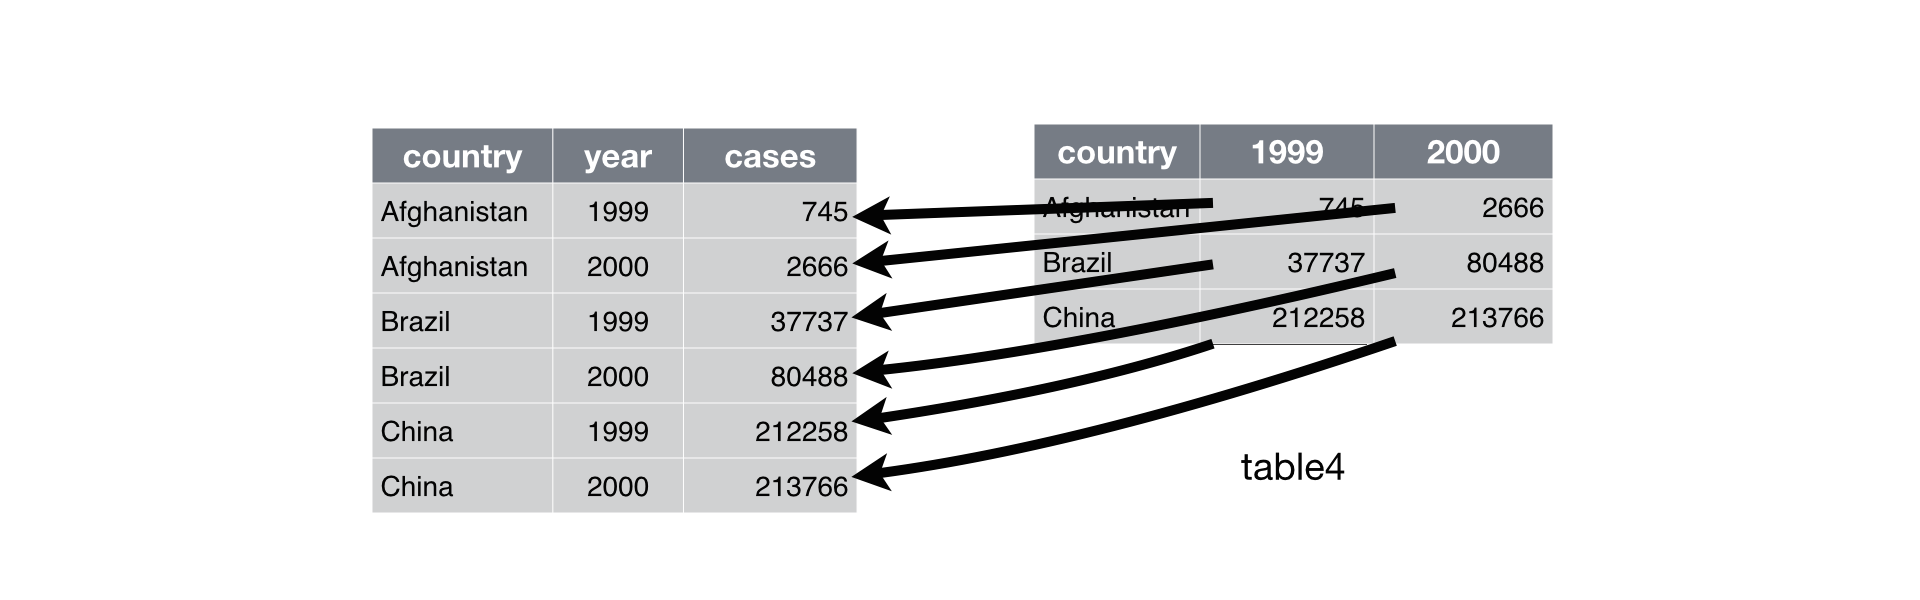


The resulting type of table is called **long format** table, one column with the name of the variable and another column with the corresponding values. Information about a single sample is scattered across multiple rows.


We can directly call `melt()` to do this. 

In [18]:
table4a = pd.DataFrame({
    'country': ['Afghanistan', 'Brazil', 'China'],
    '1999': [745, 37737, 212258],
    '2000': [2666, 80488, 213766]
})
table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


In [19]:
tidy4a = table4a.melt(
  id_vars = ['country'],
  value_vars = ['1999', '2000'],
  var_name = 'year',
  value_name = 'cases'
)
tidy4a

,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


Let's do this to our temperature data.

<!--
df = df.melt(
  id_vars = ['ID', 'Year', 'Name'],
  value_vars = [f'VALUE{i}' for i in range(1, 13)],
  var_name = 'Month',
  value_name = 'Temperature (C)'
)
df
-->

In [20]:
df = df.melt(
    id_vars = ["ID", "Year", "Name"],
    value_vars = [f"VALUE{i}" for i in range(1, 13)],
    var_name = "Month",
    value_name = "Temperature (C)"
)
df
                 
                

,ID,Year,Name,Month,Temperature (C)
0,ACW00011604,2011,Antigua and Barbuda,VALUE1,-83.0
1,ACW00011604,2012,Antigua and Barbuda,VALUE1,121.0
2,ACW00011604,2013,Antigua and Barbuda,VALUE1,-104.0
3,AE000041196,2011,United Arab Emirates,VALUE1,1950.0
4,AE000041196,2012,United Arab Emirates,VALUE1,1837.0
...,...,...,...,...,...
1677499,ZI000067983,2012,Zimbabwe,VALUE12,2199.0
1677500,ZI000067983,2013,Zimbabwe,VALUE12,2142.0
1677501,ZI000067983,2014,Zimbabwe,VALUE12,NaN
1677502,ZI000067983,2015,Zimbabwe,VALUE12,2405.0


In [ ]:
df.head()

In [ ]:
type(df)

**Note:** We can also undo what we just did with the `pivot()` method. 

In [23]:
df.pivot(
    index = ['ID', 'Year', 'Name'],
    columns = 'Month',
    values = 'Temperature (C)'
).reset_index()

Month,ID,Year,Name,VALUE1,VALUE10,VALUE11,VALUE12,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9
0,ACW00011604,2011,Antigua and Barbuda,-83.0,987.0,721.0,428.0,-132.0,278.0,1040.0,1213.0,1663.0,1875.0,1723.0,1466.0
1,ACW00011604,2012,Antigua and Barbuda,121.0,826.0,620.0,-234.0,-98.0,592.0,646.0,1365.0,1426.0,1771.0,1748.0,1362.0
2,ACW00011604,2013,Antigua and Barbuda,-104.0,1042.0,601.0,NaN,-93.0,-48.0,595.0,NaN,1612.0,1855.0,1802.0,1359.0
3,AE000041196,2011,United Arab Emirates,1950.0,2940.0,2390.0,1905.0,2060.0,2280.0,2760.0,3240.0,3447.0,3580.0,3650.0,3316.0
4,AE000041196,2012,United Arab Emirates,1837.0,NaN,NaN,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139787,ZI000067983,2012,Zimbabwe,2186.0,NaN,2298.0,2199.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0
139788,ZI000067983,2013,Zimbabwe,NaN,1967.0,2258.0,2142.0,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0
139789,ZI000067983,2014,Zimbabwe,NaN,2110.0,2297.0,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0
139790,ZI000067983,2015,Zimbabwe,2175.0,2290.0,2230.0,2405.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0


We are now very close to our goal. The final step is to create a `datetime` column that reflects both the year and month. First, we can extract the month by picking out everything after the `"VALUE"` in the `Month` column.
<!--
df["Month"] = df["Month"].str[5:].astype(int)
df.head()
-->

**POLL (multiple answer)**: What would be the advantage of long format table over wide format table?

- A. More flexible for adding new variables or observations
- B. Can be more compact, requiring less storage space
- C. Easier for human to interpret
- D. Easier to handle with statistial data analysis software

In [24]:
df["Month"] = df["Month"].str[5:].astype(int)

In [25]:
df.head()

,ID,Year,Name,Month,Temperature (C)
0,ACW00011604,2011,Antigua and Barbuda,1,-83.0
1,ACW00011604,2012,Antigua and Barbuda,1,121.0
2,ACW00011604,2013,Antigua and Barbuda,1,-104.0
3,AE000041196,2011,United Arab Emirates,1,1950.0
4,AE000041196,2012,United Arab Emirates,1,1837.0


Next, we'll create a new `datetime` column called `Date`. To do so, we can first create a string of the form `YYYY-MM`:
<!--
df["Date"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)
df.head()
-->

In [26]:
df["Date"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)
df.head()

,ID,Year,Name,Month,Temperature (C),Date
0,ACW00011604,2011,Antigua and Barbuda,1,-83.0,2011-1
1,ACW00011604,2012,Antigua and Barbuda,1,121.0,2012-1
2,ACW00011604,2013,Antigua and Barbuda,1,-104.0,2013-1
3,AE000041196,2011,United Arab Emirates,1,1950.0,2011-1
4,AE000041196,2012,United Arab Emirates,1,1837.0,2012-1


We can convert the result to a `DateTime` using a built-in `pandas` function, `to_datetime()`. The nice thing about this function is that it can automatically detect several common formats of date-time strings. 
<!--
df["Date"] = pd.to_datetime(df["Date"])
df.head()
-->

In [27]:
df["Date"] = pd.to_datetime(df["Date"])

### Plotting


<!--
averages = df.groupby(["Name", "Date"])[["Temperature (C)"]].mean()/100
averages.head()
-->

In [28]:
averages = df.groupby(["Name", "Date"])[["Temperature (C)"]].mean() /100

In [29]:
averages.head()

Temperature (C)
Name        Date                       
Afghanistan 2011-01-01         5.136667
            2011-02-01         6.280000
            2011-03-01        12.643333
            2011-04-01        19.070000
            2011-05-01        26.703333

In [30]:
averages.index

MultiIndex([('Afghanistan', '2011-01-01'),
            ('Afghanistan', '2011-02-01'),
            ('Afghanistan', '2011-03-01'),
            ('Afghanistan', '2011-04-01'),
            ('Afghanistan', '2011-05-01'),
            ('Afghanistan', '2011-06-01'),
            ('Afghanistan', '2011-07-01'),
            ('Afghanistan', '2011-08-01'),
            ('Afghanistan', '2011-09-01'),
            ('Afghanistan', '2011-10-01'),
            ...
            (   'Zimbabwe', '2020-03-01'),
            (   'Zimbabwe', '2020-04-01'),
            (   'Zimbabwe', '2020-05-01'),
            (   'Zimbabwe', '2020-06-01'),
            (   'Zimbabwe', '2020-07-01'),
            (   'Zimbabwe', '2020-08-01'),
            (   'Zimbabwe', '2020-09-01'),
            (   'Zimbabwe', '2020-10-01'),
            (   'Zimbabwe', '2020-11-01'),
            (   'Zimbabwe', '2020-12-01')],
           names=['Name', 'Date'], length=24588)

In [31]:
type(averages)

pandas.core.frame.DataFrame

`reset_index()`: turn index columns back to regular columns

In [32]:
averages = averages.reset_index()
averages.head()

,Name,Date,Temperature (C)
0,Afghanistan,2011-01-01,5.136667
1,Afghanistan,2011-02-01,6.280000
2,Afghanistan,2011-03-01,12.643333
3,Afghanistan,2011-04-01,19.070000
4,Afghanistan,2011-05-01,26.703333


Finally, we'll make the plot! To avoid clutter, we only plot the countries whose English names begin with a given letter. The `lineplot` function of `seaborn` makes it easy to plot many labeled timeseries simultaneously. 
<!--
begins_with = averages[averages["Name"].str[0] == "E"]

sns.lineplot(data = begins_with, 
             x = "Date", 
             y = "Temperature (C)", 
             hue = "Name")

# legend needs to be adjusted
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
plt.savefig("pd-1-example-plot.png", bbox_inches = "tight")
-->

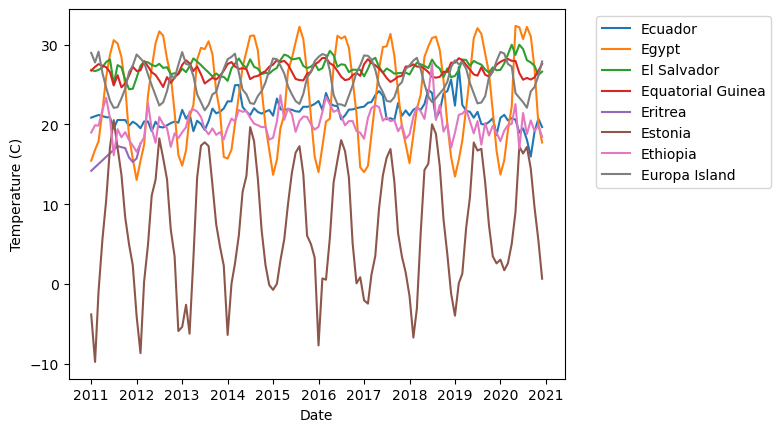

In [33]:
begins_with = averages[averages["Name"].str[0] == "E"]

sns.lineplot(data = begins_with,
             x = "Date",
             y = "Temperature (C)",
             hue = "Name")

# legend needs to be adjusted
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
plt.savefig("pd-1-example-plot.png", bbox_inches = "tight")

We did it! Constructing this plot from the supplied data required us to *merge* and *stack* our data. This is a common pattern in applied data analysis -- we need to manipulate our data in a number of ways prior to the cool plotting or machine learning. 

### Takeaways for Today

Here's what I want you to take away from this lecture: 

1. Many **data visualization** problems can be solved by **data manipulation**. 
2. `pandas` provides a number of handy methods for combining and reshaping your data. 
3. Pandas are very clumsy animals. 